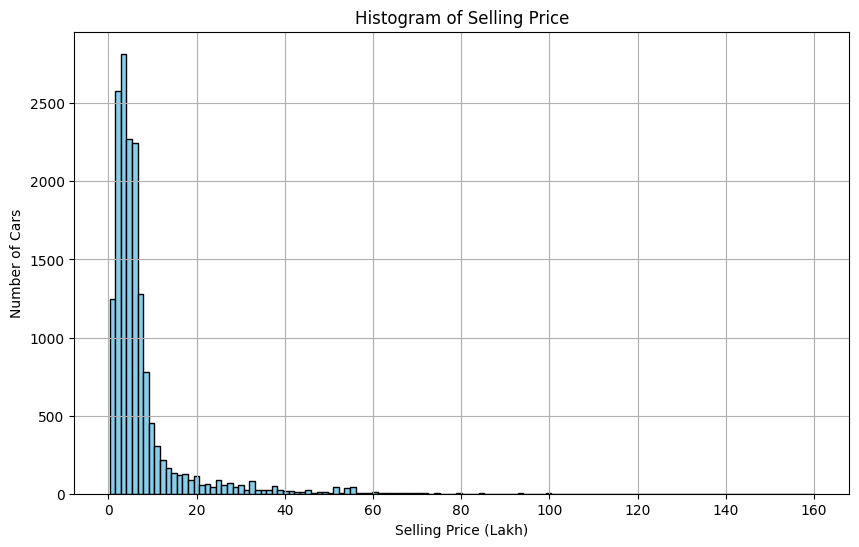

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load dữ liệu
df = pd.read_csv("processed_data/preprocessed_dataset.csv")

# Lấy cột 'selling_price'
prices = df['selling_price']

# Tính số bin theo căn bậc hai của số lượng mẫu
num_bins = int(math.sqrt(len(prices)))

# Vẽ histogram
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=num_bins, color='skyblue', edgecolor='black')
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price (Lakh)')
plt.ylabel('Number of Cars')
plt.grid(True)
plt.show()

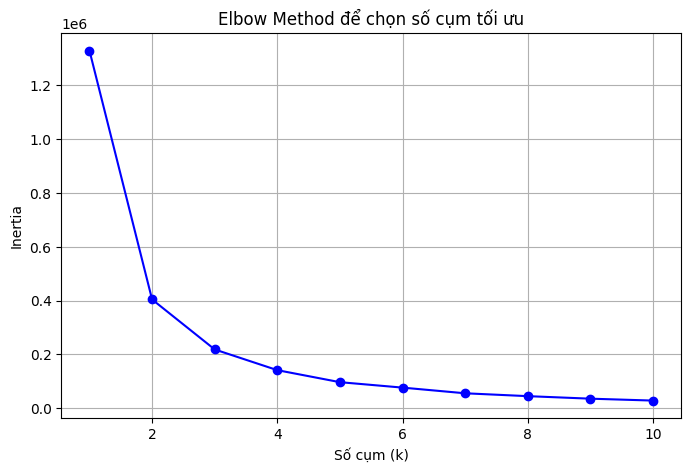

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Đọc dữ liệu
preprocessed_df = pd.read_csv('processed_data/preprocessed_dataset.csv')
prices = preprocessed_df[['selling_price']].values

# Elbow method để xác định số cụm tốt nhất
inertias = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(prices)
    inertias.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method để chọn số cụm tối ưu')
plt.grid(True)
plt.show()


In [3]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
preprocessed_df['price_group'] = kmeans.fit_predict(prices)

# Gắn nhãn cho từng cụm theo thứ tự giá trị trung tâm tăng dần
centroids = kmeans.cluster_centers_.flatten()
sorted_indices = centroids.argsort()  # chỉ số theo thứ tự tăng dần
labels = ['Low', 'High']  # hoặc đổi lại theo số cụm

# Tạo ánh xạ từ cluster index sang nhãn
cluster_to_label = {idx: labels[i] for i, idx in enumerate(sorted_indices)}
preprocessed_df['price_group'] = preprocessed_df['price_group'].map(cluster_to_label)

# Lưu các file mà không có cột 'price_group'
for label in labels:
    group_df = preprocessed_df[preprocessed_df['price_group'] == label].drop(columns=['price_group'])
    file_path = f'processed_data/by_price/{label}_price_group.csv'
    group_df.to_csv(file_path, index=False)
    print(f"Saved {len(group_df)} records for {label} price group → {file_path}")


Saved 14932 records for Low price group → processed_data/by_price/Low_price_group.csv
Saved 1015 records for High price group → processed_data/by_price/High_price_group.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plot_histograms(df, columns, figsize=(15, 12), bins_method='sqrt'):
    """
    Plot histograms for continuous columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        columns (list): List of column names to plot histograms for.
        figsize (tuple): Figure size (default is (15, 12)).
        bins_method (str): Method for calculating bins using numpy.histogram_bin_edges() (default is 'sqrt').

    Returns:
        None (Displays the plots).
    """
    plt.figure(figsize=figsize)

    for index, col in enumerate(columns):
        plt.subplot(2, 2, index + 1)
        
        # Convert column to numeric type, removing invalid values
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        
        # Compute bin edges using the specified method
        bin_edges = np.histogram_bin_edges(data, bins=bins_method)
        num_bins = len(bin_edges) - 1  # Actual number of bins
        
        # Plot histogram with the calculated number of bins
        sns.histplot(data=data, bins=num_bins, color=sns.color_palette('pastel')[index], kde=True)
        
        plt.title(col.replace('_', ' ').capitalize(), fontsize=14, pad=10)
        plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tick_params(axis='both', labelsize=10)

    plt.tight_layout()
    plt.show()


In [5]:
import pandas as pd

# Đọc lại các file CSV vào 3 DataFrame
low_price_df = pd.read_csv('processed_data/by_price/Low_price_group.csv')
high_price_df = pd.read_csv('processed_data/by_price/High_price_group.csv')

# Hiển thị thông tin về kích thước của từng DataFrame
print(f"Low price group: {low_price_df.shape[0]} records")
print(f"High price group: {high_price_df.shape[0]} records")

# Xem trước dữ liệu của một DataFrame
low_price_df.head()


Low price group: 14932 records
High price group: 1015 records


,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,23,2014,4.50,11.887938,0,1,0,23.40,1248.0,74.00,5.0
1,32,2014,3.70,11.695255,0,1,2,21.14,1498.0,103.52,5.0
2,11,2006,1.58,11.849405,1,1,3,17.70,1497.0,78.00,5.0
3,12,2010,2.25,11.751950,0,1,0,23.00,1396.0,90.00,5.0
4,23,2007,1.30,11.695255,1,1,0,16.10,1298.0,88.20,5.0


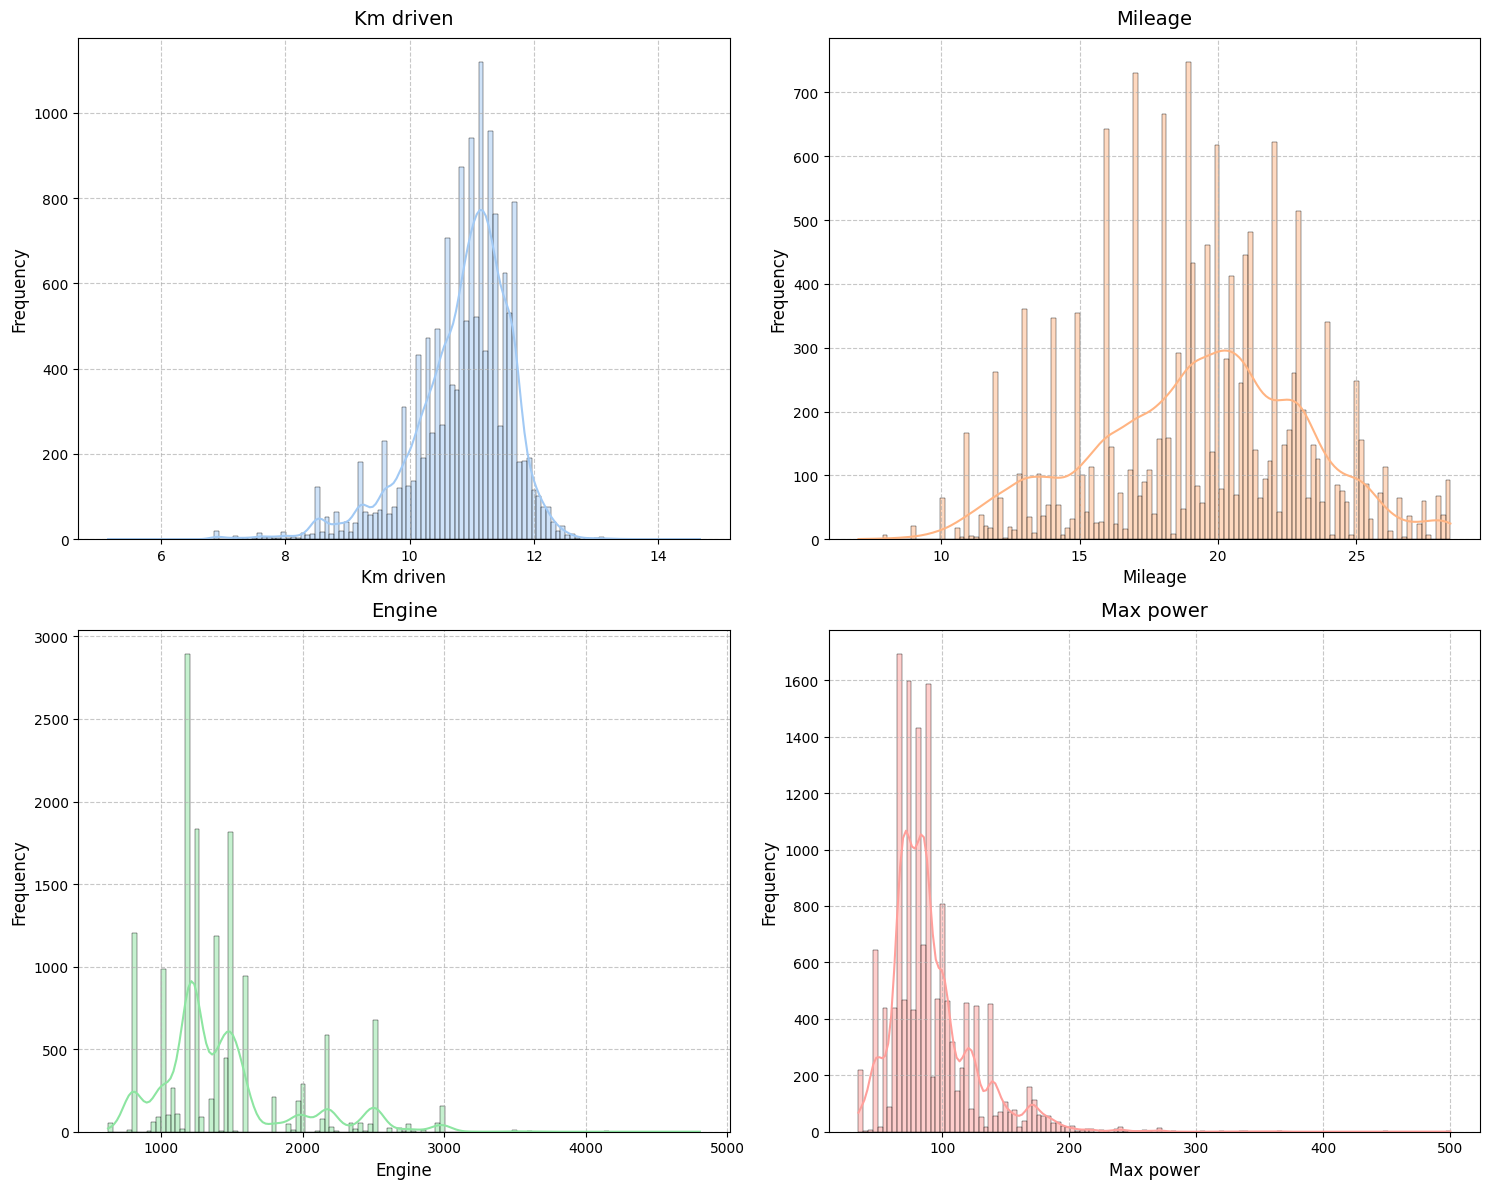

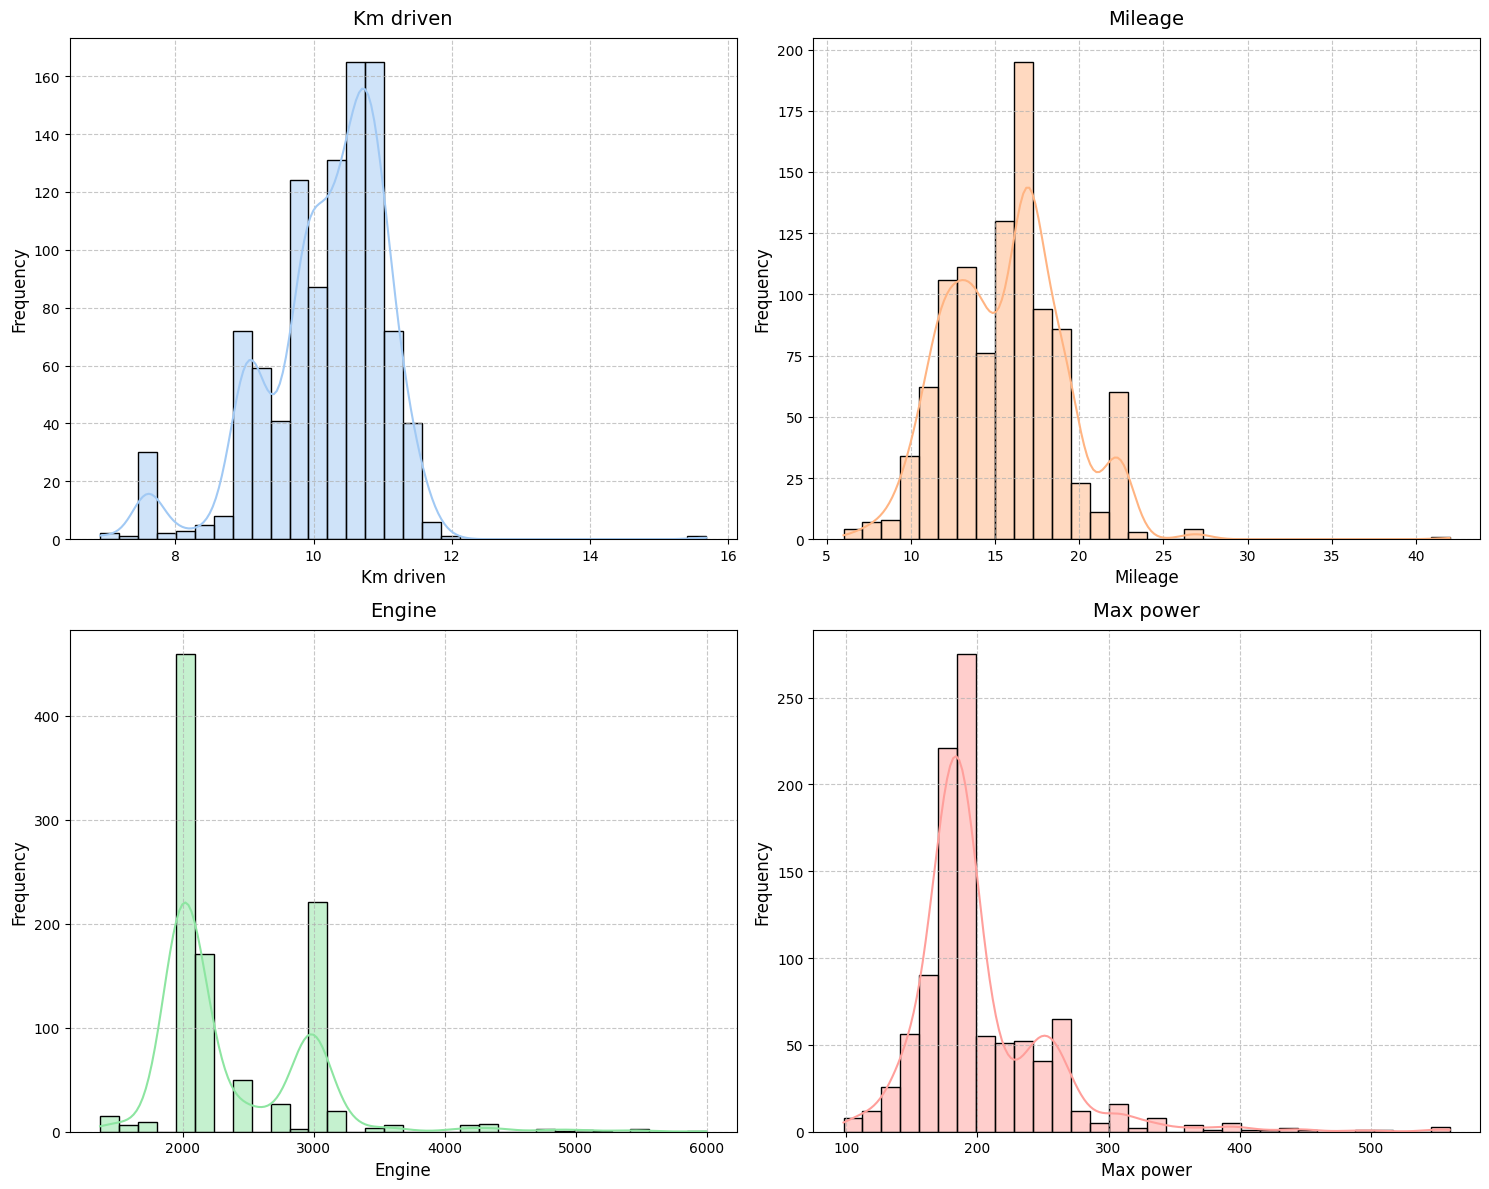

In [6]:
continuous_raw_columns = ['km_driven', 'mileage', 'engine', 'max_power']
plot_histograms(low_price_df, continuous_raw_columns)
plot_histograms(high_price_df, continuous_raw_columns)

In [7]:
def draw_correlation_matrix(df, figsize=(12, 10)):
    """
    Draw a correlation matrix for the specified columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        columns (list): List of column names to include in the correlation matrix.
        figsize (tuple): Figure size (default is (12, 10)).

    Returns:
        None (Displays the plot).
    """
    plt.figure(figsize=figsize)
    
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Plot the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', 
                annot_kws={"size": 10}, linewidths=0.5, fmt=".2f")
    
    plt.title('Correlation Matrix', fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()



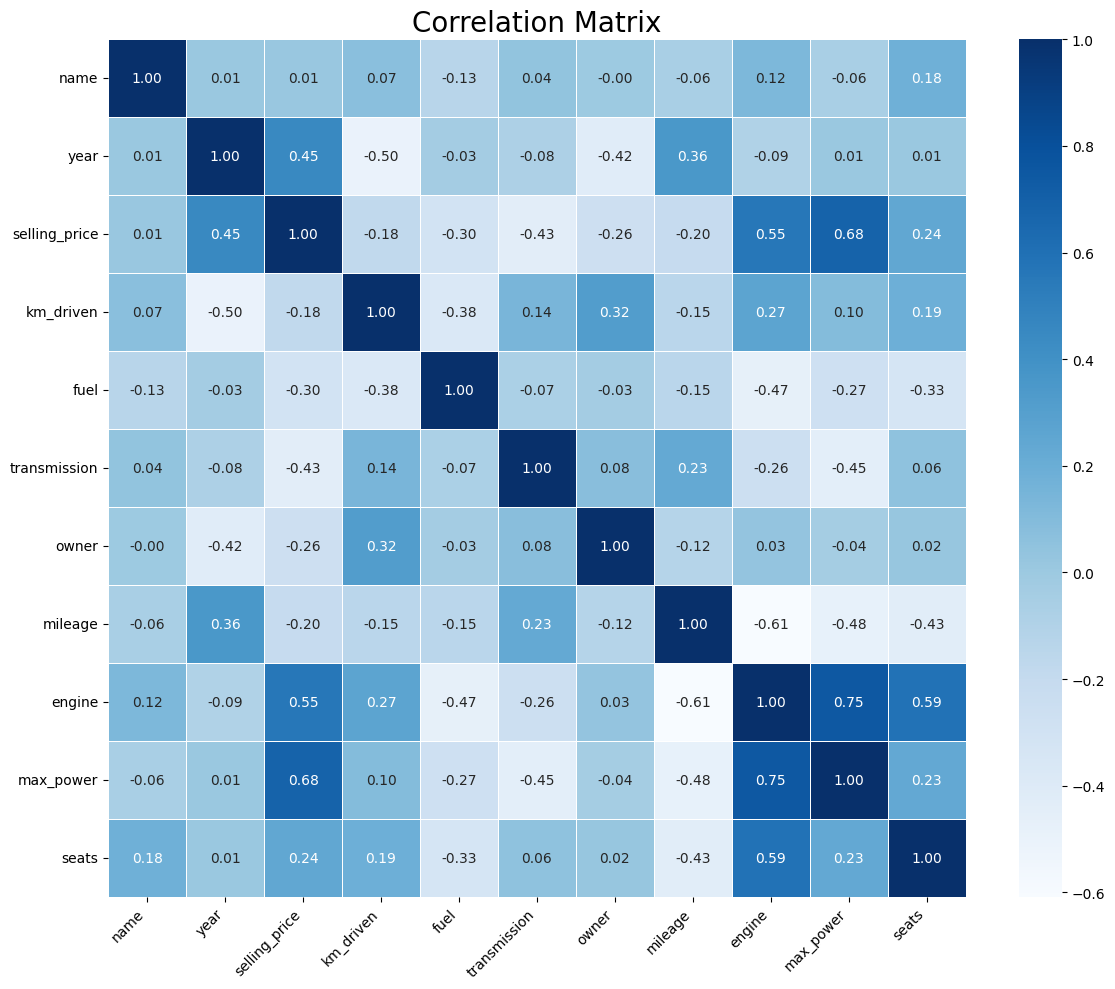

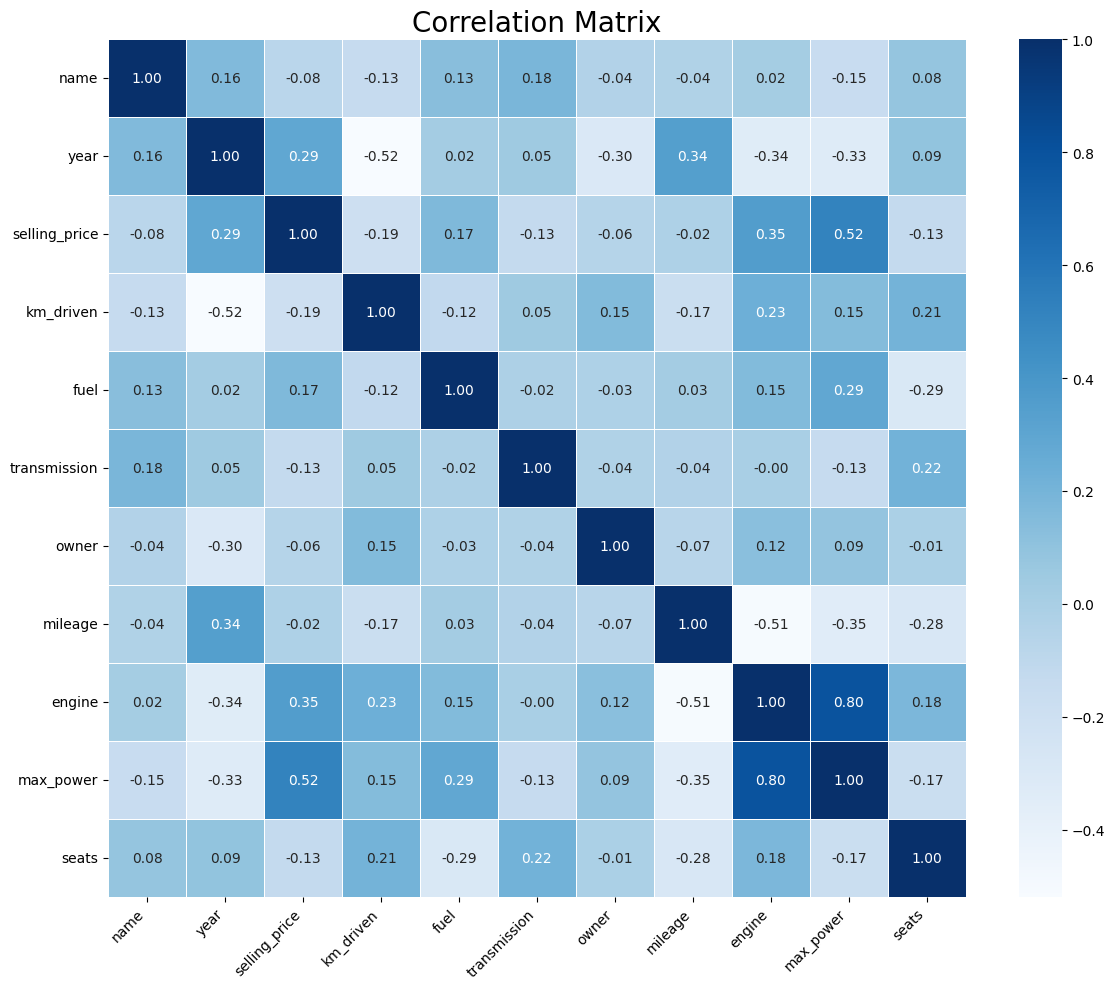

In [8]:
draw_correlation_matrix(low_price_df, figsize=(12, 10))
draw_correlation_matrix(high_price_df, figsize=(12, 10))

In [9]:
def plot_correlation_with_price(df, figsize=(12, 6)):
    """
    Plot the correlation of features with the selling price.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        figsize (tuple): Figure size (default is (12, 6)).

    Returns:
        None (Displays the plot).
    """
    plt.figure(figsize=figsize)
    
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Get the correlation of all features with 'selling_price'

    corr_with_price = correlation_matrix['selling_price'].drop('selling_price').sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=corr_with_price.index, y=corr_with_price.values, hue=corr_with_price.index, palette='Blues_d')

    plt.title('Correlation of Features with Selling Price', fontsize=16, pad=20)

    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Correlation Coefficient', fontsize=12)

    plt.xticks(rotation=45, ha='right', fontsize=10)

    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

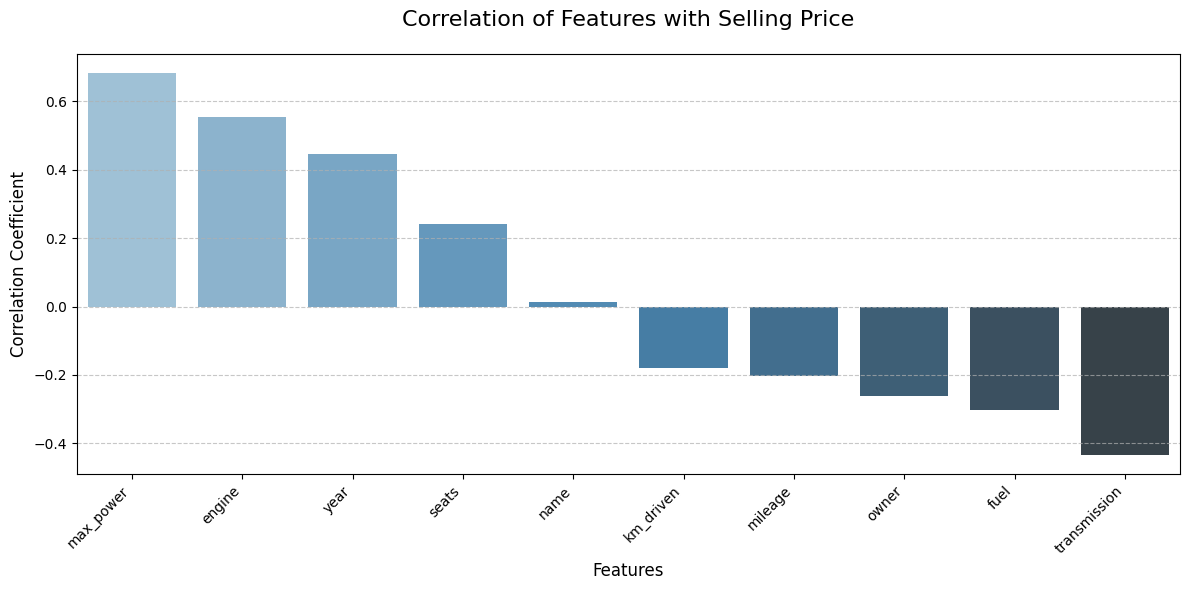

<Figure size 1200x600 with 0 Axes>

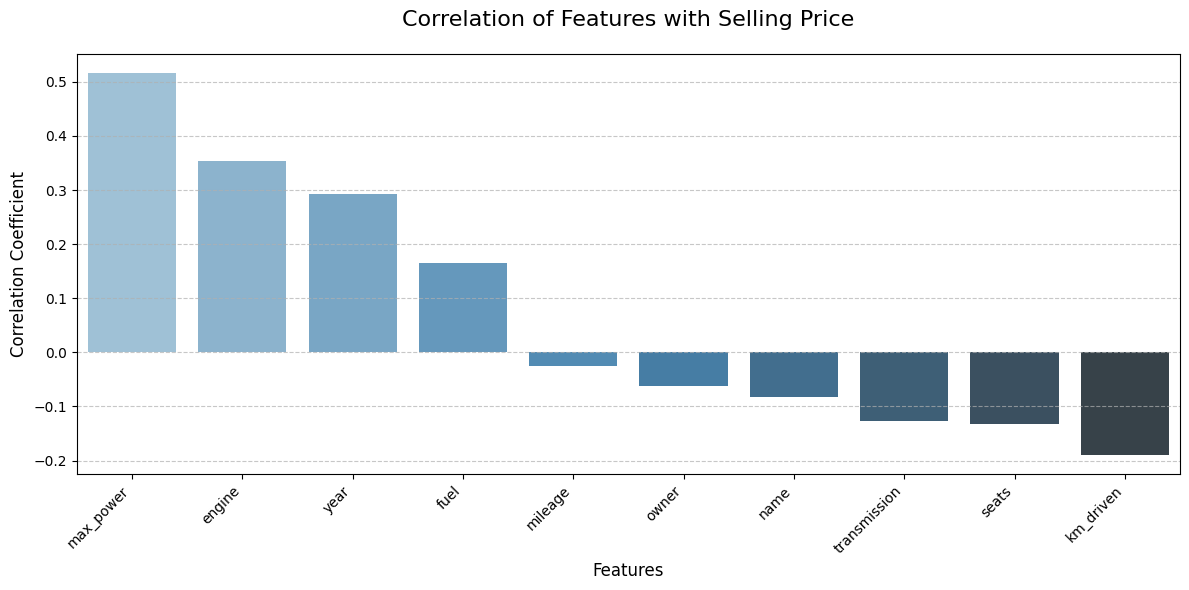

In [10]:
plot_correlation_with_price(low_price_df, figsize=(12, 6))
plot_correlation_with_price(high_price_df, figsize=(12, 6))

In [11]:
from joblib import load

# Load lại label encoders
label_encoders = load('processed_data/label_encoders.sav')

# Các cột dạng phân loại
categorical_columns = ['name', 'fuel', 'transmission', 'owner']

# In mapping cho từng cột
for col in categorical_columns:
    if col in label_encoders:
        encoder = label_encoders[col]
        mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        print(f"Mapping for '{col}':")
        for k, v in mapping.items():
            print(f"  {v} → '{k}'")
        print()
    else:
        print(f"[!] Không tìm thấy encoder cho cột '{col}'\n")


Mapping for 'name':
  0 → 'Ambassador'
  1 → 'Ashok'
  2 → 'Audi'
  3 → 'BMW'
  4 → 'Bentley'
  5 → 'Chevrolet'
  6 → 'Daewoo'
  7 → 'Datsun'
  8 → 'Fiat'
  9 → 'Force'
  10 → 'Ford'
  11 → 'Honda'
  12 → 'Hyundai'
  13 → 'ISUZU'
  14 → 'Isuzu'
  15 → 'Jaguar'
  16 → 'Jeep'
  17 → 'Kia'
  18 → 'Lamborghini'
  19 → 'Land'
  20 → 'Lexus'
  21 → 'MG'
  22 → 'Mahindra'
  23 → 'Maruti'
  24 → 'Mercedes-Benz'
  25 → 'Mini'
  26 → 'Mitsubishi'
  27 → 'Nissan'
  28 → 'Opel'
  29 → 'Peugeot'
  30 → 'Porsche'
  31 → 'Renault'
  32 → 'Skoda'
  33 → 'Tata'
  34 → 'Toyota'
  35 → 'Volkswagen'
  36 → 'Volvo'

Mapping for 'fuel':
  0 → 'Diesel'
  1 → 'Petrol'

Mapping for 'transmission':
  0 → 'Automatic'
  1 → 'Manual'

Mapping for 'owner':
  0 → 'First'
  1 → 'Fourth & Above'
  2 → 'Second'
  3 → 'Third'



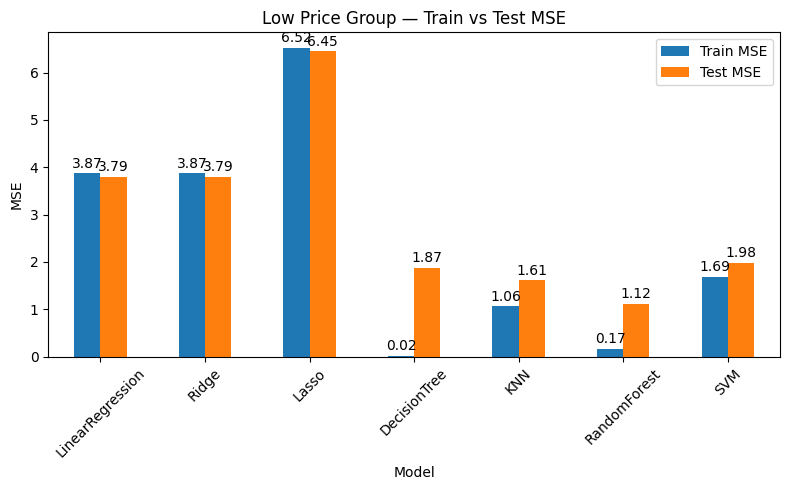

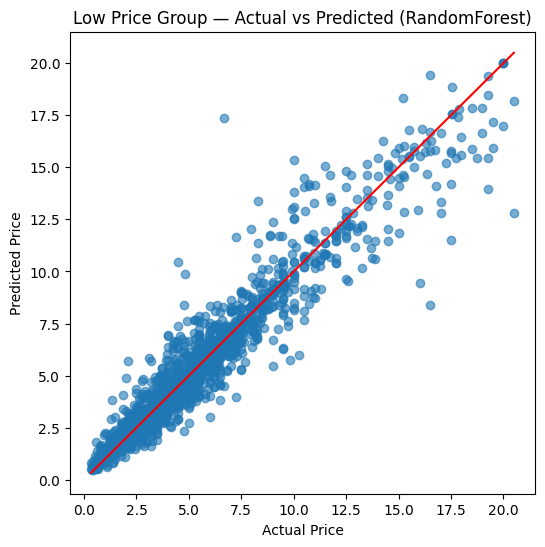

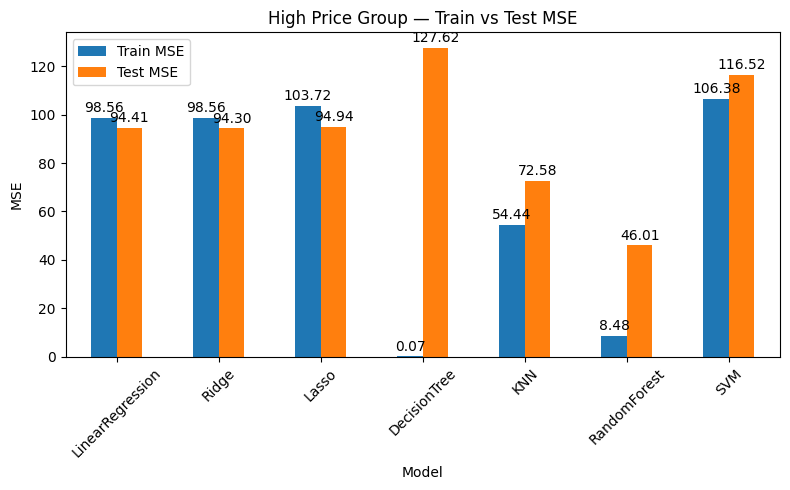

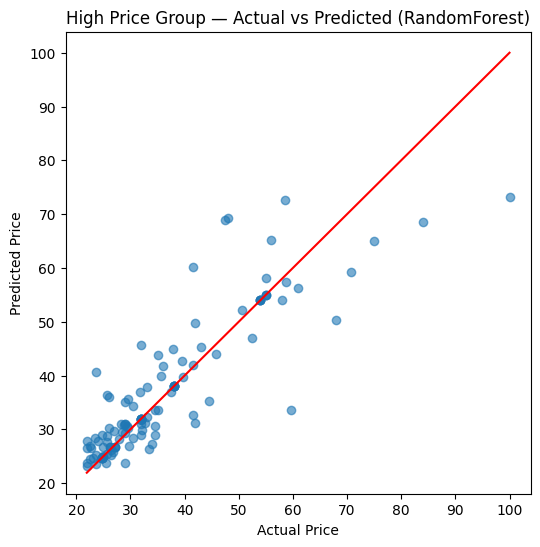

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Danh sách các model
MODELS = {
    'LinearRegression': LinearRegression(), 
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(),
    'SVM': SVR()
}

def evaluate_and_plot(df, group_name, test_size=0.12, random_state=42):
    # Tách X, y
    X = df.drop(columns=['selling_price'])
    y = df['selling_price']
    
    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)
    
    # Scale
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s  = scaler.transform(X_test)
    
    # Train & tính metrics
    records = []
    best_mse = float('inf')
    best_name = None
    best_pred = None
    
    for name, model in MODELS.items():
        model.fit(X_train_s, y_train)
        y_pred_train = model.predict(X_train_s)
        y_pred_test  = model.predict(X_test_s)
        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse  = mean_squared_error(y_test,  y_pred_test)
        records.append((name, train_mse, test_mse))
        if test_mse < best_mse:
            best_mse   = test_mse
            best_name  = name
            best_pred  = y_pred_test
    
    # DataFrame kết quả
    df_res = pd.DataFrame(records, columns=['Model','Train MSE','Test MSE']).set_index('Model')
    
    # Bar chart so sánh Train vs Test MSE
    ax = df_res.plot.bar(rot=45, figsize=(8,5), title=f"{group_name} — Train vs Test MSE")
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=2)
    ax.set_ylabel("MSE")
    plt.tight_layout()
    plt.show()
    
    # Scatter Actual vs Predicted (best model)
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, best_pred, alpha=0.6)
    mn, mx = y_test.min(), y_test.max()
    plt.plot([mn,mx],[mn,mx], color='red')
    plt.title(f"{group_name} — Actual vs Predicted ({best_name})")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.show()
    
    return df_res, best_name

# Ví dụ gọi hàm cho 3 nhóm:
res_low,  best_low  = evaluate_and_plot(low_price_df,  "Low Price Group")
# res_mid,  best_mid  = evaluate_and_plot(mid_price_df,  "Mid Price Group")
res_high, best_high = evaluate_and_plot(high_price_df, "High Price Group")
